In [ ]:
import os
if "COLAB_GPU" in os.environ:
  print("enabled")
else:
  print("disabled")

enabled


In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 36.0 MB/s eta 0:00:00


In [ ]:
import ultralytics
ultralytics.checks()

Ultralytics 8.3.228 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 38.2/112.6 GB disk)


In [ ]:
%pwd

'/content'

In [ ]:
!mkdir TreeEnumeration


In [ ]:
os.chdir("/content/TreeEnumeration")

In [ ]:
%pwd

'/content/TreeEnumeration'

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="Ca2KRi5hNlmKIHKHCJQz")
project = rf.workspace("m-rizky-fajar-mali").project("tree-detection-iqy2i")
version = project.version(9)
dataset = version.download("yolov11")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 20.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 51.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 44.8 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
  Attempting uninstall: idna
    Found existing installation: idna 3.11
    Uninstalling idna-3.11:
      Successfully uninstalled idna-3.11


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Tree-Detection-9 in yolov11:: 100%|██████████| 4288/4288 [00:27<00:00, 156.57it/s]


In [ ]:
os.chdir("/content/TreeEnumeration/Tree-Detection-9")

In [ ]:
%pwd

'/content/TreeEnumeration/Tree-Detection-9'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
SAVE_DIR = "/content/drive/MyDrive/tree_model"  # change folder name if you want!


In [ ]:
import os
os.makedirs(SAVE_DIR, exist_ok=True)
print("Saving all models to:", SAVE_DIR)


Saving all models to: /content/drive/MyDrive/tree_model


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install ultralytics==8.3.50 --quiet
from ultralytics import YOLO


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 899.0/899.0 kB 23.4 MB/s eta 0:00:00


In [ ]:
MODEL_PATH = "/content/drive/MyDrive/tree_model/final_tree_detector/weights/best.pt"

model = YOLO(MODEL_PATH)
print("Loaded model:", MODEL_PATH)


Loaded model: /content/drive/MyDrive/tree_model/final_tree_detector/weights/best.pt


In [ ]:
from ultralytics import YOLO
import torch

# Load your trained best model
model = YOLO("/content/drive/MyDrive/tree_model/final_tree_detector/weights/best.pt")

# Clear GPU cache to free up memory
torch.cuda.empty_cache()

# Train further (resume fine-tuning)
results = model.train(
    data="/content/TreeEnumeration/Tree-Detection-9/data.yaml",
    epochs=100,
    imgsz=640,              # Reduced image size for memory
    batch=2,                # Reduced batch size for memory
    device=0,

    # --- HIGH ACCURACY SETTINGS ---
    optimizer="AdamW",
    lr0=0.0008,             # good for fine-tuning
    weight_decay=0.0003,
    cos_lr=True,
    patience=20,            # early stopping

    # --- LIGHT BUT EFFECTIVE AUGMENTATIONS ---
    mixup=0.0,
    mosaic=0.0,             # disable heavy mosaic during fine-tune
    fliplr=0.5,
    translate=0.1,
    scale=0.5,
    hsv_h=0.015,
    hsv_s=0.7,
    hsv_v=0.4,

    # --- MEMORY-SAFE SETTINGS ---
    workers=2,
    amp=True,               # automatic mixed precision
    multi_scale=False,
    pretrained=True,

    # --- SAVE CHECKPOINTS SAFELY TO DRIVE ---
    project="/content/drive/MyDrive/tree_enum_model",
    name="resume_training",
    exist_ok=True
)

Ultralytics 8.3.228 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=2, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=True, cutmix=0.0, data=/content/TreeEnumeration/Tree-Detection-9/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.0008, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=/content/drive/MyDrive/tree_model/final_tree_detector/weights/best.pt, momentum=0.937, mosaic=0.0, multi_scale=False, name=resume_training, nbs=64, nms=False, opset=None, optimize=Fa

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!pip install roboflow


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 21.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 68.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 106.2 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
  Attempting uninstall: idna
    Found existing installation: idna 3.11
    Uninstalling idna-3.11:
      Successfully uninstalled idna-3.11


In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="Ca2KRi5hNlmKIHKHCJQz")
project = rf.workspace("m-rizky-fajar-mali").project("tree-detection-iqy2i")
version = project.version(9)
dataset = version.download("yolov11")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Tree-Detection-9 in yolov11:: 100%|██████████| 4288/4288 [00:26<00:00, 163.70it/s]


In [ ]:
!pip install ultralytics


In [ ]:
from ultralytics import YOLO
model = YOLO("/content/drive/MyDrive/tree_enum_model/resume_training/weights/best.pt")

metrics = model.val(
    data="/content/Tree-Detection-9/data.yaml",
    imgsz=640,
    batch=1,     # CPU-friendly
    device="cpu"
)



Ultralytics 8.3.228 🚀 Python-3.12.12 torch-2.8.0+cu126 CPU (Intel Xeon CPU @ 2.20GHz)
YOLO11m summary (fused): 125 layers, 20,031,574 parameters, 0 gradients, 67.7 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2246.1±1271.6 MB/s, size: 1567.2 KB)
val: Scanning /content/Tree-Detection-9/valid/labels... 218 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 218/218 177.5it/s 1.2s
val: New cache created: /content/Tree-Detection-9/valid/labels.cache
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 218/218 1.0s/it 3:40
                   all        218       6276       0.76       0.67      0.729      0.578
              Not Tree        211       2278      0.783      0.598      0.662      0.556
                  Tree        218       3998      0.736      0.742      0.797      0.601
Speed: 1.1ms preprocess, 925.5ms inference, 0.0ms loss, 2.2ms postprocess per image
Results saved to /content/runs/detect/val4


In [ ]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
import os
from IPython.display import Image, display


In [ ]:
RUN_DIR = "/content/drive/MyDrive/tree_enum_model/resume_training"


In [ ]:
results_csv = os.path.join(RUN_DIR, "results.csv")
train_df = pd.read_csv(results_csv)

print("Training metrics loaded!")
train_df.head()


Training metrics loaded!


,epoch,time,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
0,1,217.979,1.05958,1.16172,1.17407,0.65913,0.59444,0.63526,0.45276,0.96156,1.11865,1.11637,0.066970,0.000266,0.000266
1,2,414.592,1.01220,1.06689,1.15255,0.66251,0.59443,0.63019,0.44683,0.98041,1.02890,1.13129,0.033903,0.000533,0.000533
2,3,613.063,0.99048,1.03046,1.14232,0.63790,0.59656,0.62993,0.45006,0.96404,1.05721,1.13745,0.000836,0.000799,0.000799
3,4,810.900,0.98608,1.00438,1.14557,0.63739,0.60366,0.62213,0.44656,0.94806,1.17012,1.13098,0.000798,0.000798,0.000798
4,5,1008.310,0.95958,0.99114,1.13410,0.66442,0.60665,0.63396,0.46091,0.95068,1.04410,1.12741,0.000797,0.000797,0.000797


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Validation metrics you provided
classes = ["Not Tree", "Tree"]

precision = [0.783, 0.736]
recall = [0.598, 0.742]
map50 = [0.662, 0.797]
map5095 = [0.556, 0.601]

overall = {
    "Precision": 0.76,
    "Recall": 0.67,
    "mAP50": 0.729,
    "mAP50-95": 0.578
}


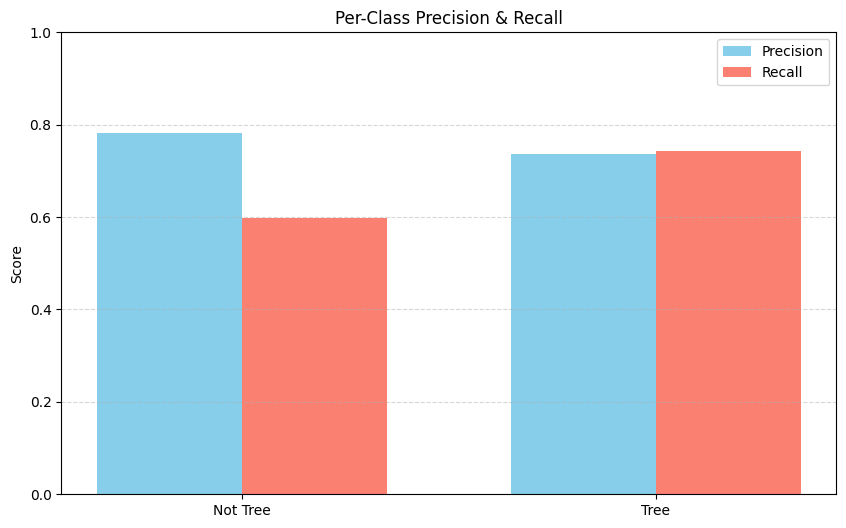

In [ ]:
plt.figure(figsize=(10,6))
x = np.arange(len(classes))
w = 0.35

plt.bar(x - w/2, precision, width=w, label="Precision", color="skyblue")
plt.bar(x + w/2, recall, width=w, label="Recall", color="salmon")

plt.xticks(x, classes)
plt.title("Per-Class Precision & Recall")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()


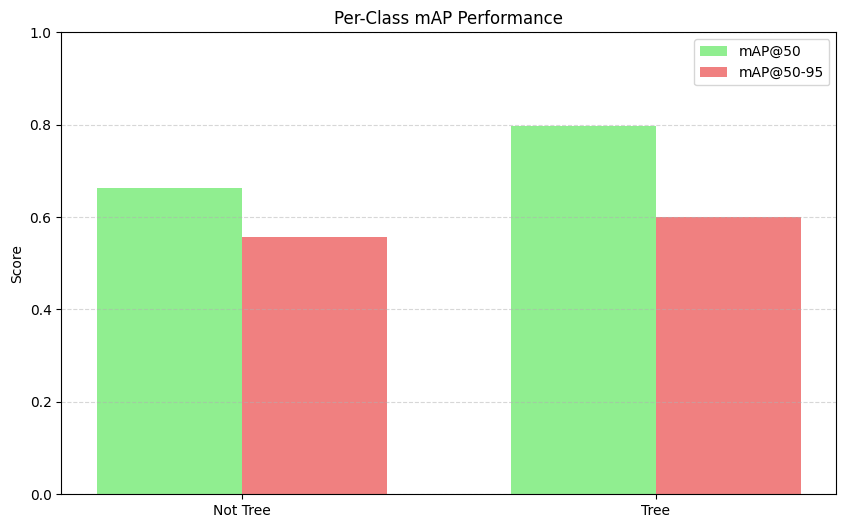

In [ ]:
plt.figure(figsize=(10,6))
plt.bar(x - w/2, map50, width=w, label="mAP@50", color="lightgreen")
plt.bar(x + w/2, map5095, width=w, label="mAP@50-95", color="lightcoral")

plt.xticks(x, classes)
plt.title("Per-Class mAP Performance")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()


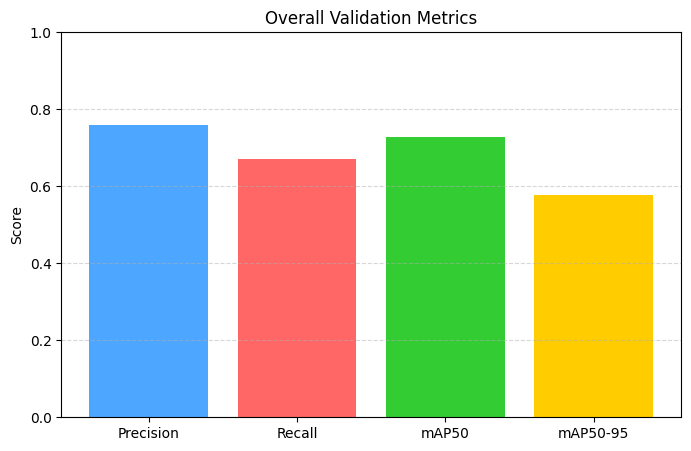

In [ ]:
plt.figure(figsize=(8,5))

plt.bar(overall.keys(), overall.values(), color=["#4da6ff", "#ff6666", "#33cc33", "#ffcc00"])
plt.ylim(0, 1)
plt.title("Overall Validation Metrics")
plt.ylabel("Score")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()


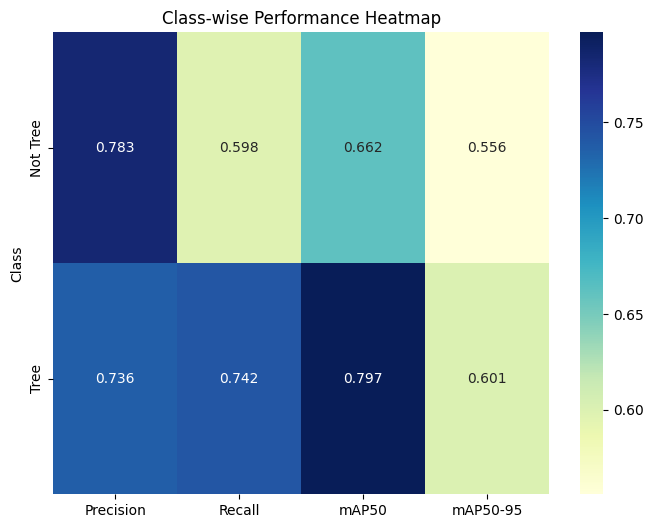

In [ ]:
import pandas as pd

data = pd.DataFrame({
    "Class": classes,
    "Precision": precision,
    "Recall": recall,
    "mAP50": map50,
    "mAP50-95": map5095
})

plt.figure(figsize=(8,6))
sns.heatmap(data.set_index("Class"), annot=True, cmap="YlGnBu", fmt=".3f")
plt.title("Class-wise Performance Heatmap")
plt.show()


Columns detected: ['epoch', 'time', 'train/box_loss', 'train/cls_loss', 'train/dfl_loss', 'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)', 'val/box_loss', 'val/cls_loss', 'val/dfl_loss', 'lr/pg0', 'lr/pg1', 'lr/pg2']

→ Final Training Metrics:
Precision : 0.7678
Recall    : 0.6599
mAP50     : 0.7236
mAP50-95  : 0.5684


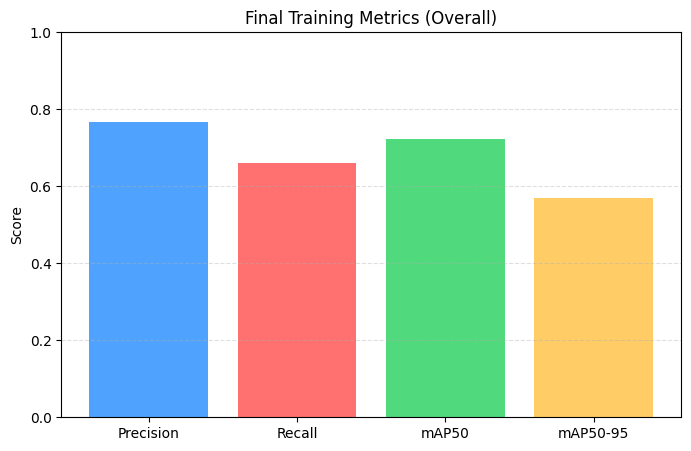

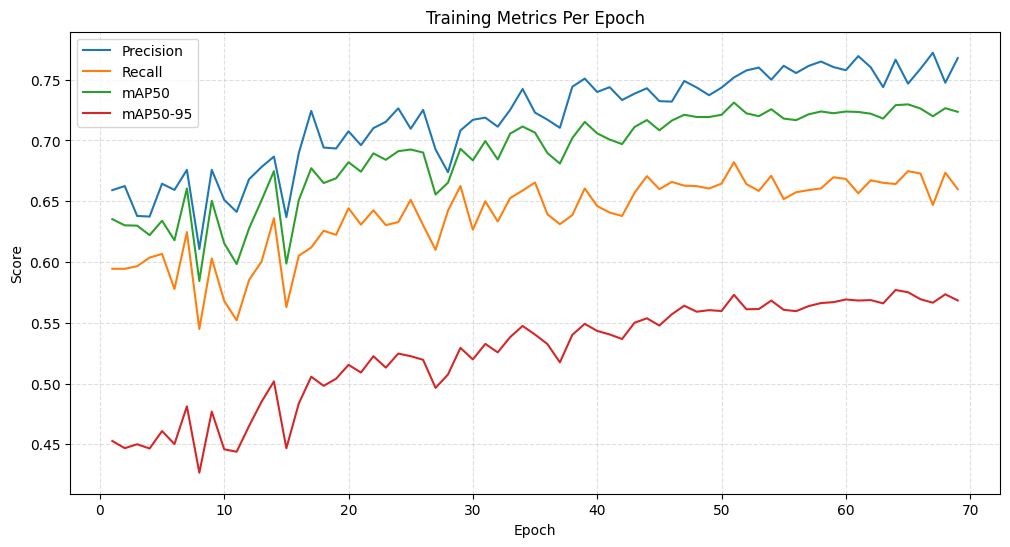

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# train_df already loaded
print("Columns detected:", train_df.columns.tolist())

# -----------------------------
# │ Extract final epoch metrics
# -----------------------------
train_precision = train_df["metrics/precision(B)"].iloc[-1]
train_recall = train_df["metrics/recall(B)"].iloc[-1]
train_map50 = train_df["metrics/mAP50(B)"].iloc[-1]
train_map5095 = train_df["metrics/mAP50-95(B)"].iloc[-1]

print("\n→ Final Training Metrics:")
print(f"Precision : {train_precision:.4f}")
print(f"Recall    : {train_recall:.4f}")
print(f"mAP50     : {train_map50:.4f}")
print(f"mAP50-95  : {train_map5095:.4f}")

# --------------------------------
# → VISUALISATION — Overall bar
# --------------------------------
plt.figure(figsize=(8,5))
metrics = {
    "Precision": train_precision,
    "Recall": train_recall,
    "mAP50": train_map50,
    "mAP50-95": train_map5095
}

plt.bar(metrics.keys(), metrics.values(),
        color=["#4fa3ff", "#ff7070", "#51d97d", "#ffcc66"])

plt.ylim(0, 1)
plt.title("Final Training Metrics (Overall)")
plt.ylabel("Score")
plt.grid(axis="y", linestyle="--", alpha=0.4)
plt.show()

# --------------------------------
# → VISUALISATION — Epoch Curves
# --------------------------------
plt.figure(figsize=(12,6))
plt.plot(train_df["epoch"], train_df["metrics/precision(B)"], label="Precision")
plt.plot(train_df["epoch"], train_df["metrics/recall(B)"], label="Recall")
plt.plot(train_df["epoch"], train_df["metrics/mAP50(B)"], label="mAP50")
plt.plot(train_df["epoch"], train_df["metrics/mAP50-95(B)"], label="mAP50-95")

plt.title("Training Metrics Per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Score")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.4)
plt.show()

In [ ]:
import shutil

source = "/content/runs"   # folder in notebook
destination = "/content/drive/MyDrive/my_folder"  # where to save in Drive

shutil.copytree(source, destination)
print("Uploaded folder to Drive!")


Uploaded folder to Drive!


In [ ]:
from ultralytics import YOLO

# Load your trained model
model = YOLO("/content/drive/MyDrive/tree_enum_model/resume_training/weights/best.pt")
print("Model loaded!")


Model loaded!


In [ ]:
image_path = "/content/Tree-Detection-9/test/images/DJI_0002_JPG.rf.e1c917acba6bd58607b96f5a05cb7231.jpg"



image 1/1 /content/Tree-Detection-9/test/images/DJI_0002_JPG.rf.e1c917acba6bd58607b96f5a05cb7231.jpg: 384x640 6 Not Trees, 13 Trees, 1882.0ms
Speed: 29.4ms preprocess, 1882.0ms inference, 4.6ms postprocess per image at shape (1, 3, 384, 640)
Results saved to /content/runs/detect/predict


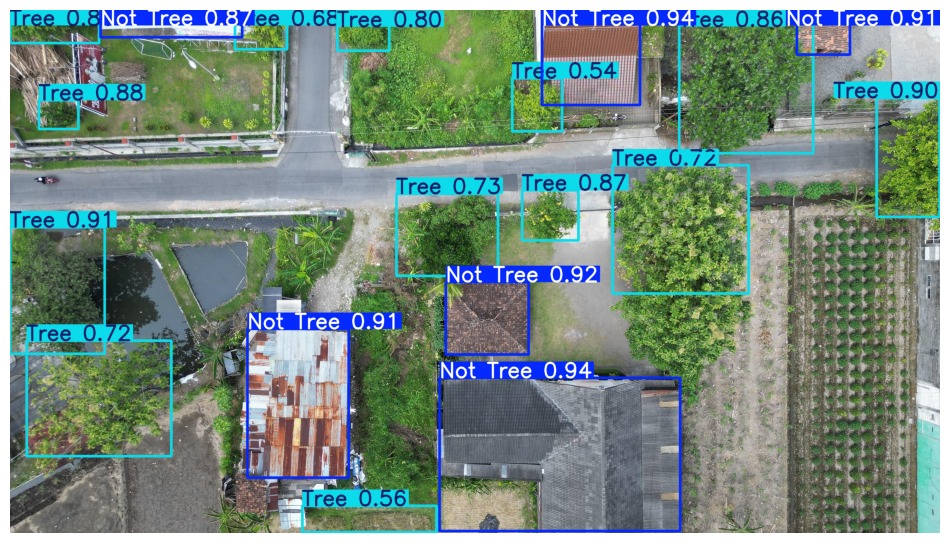

In [ ]:
import matplotlib.pyplot as plt
import cv2

results = model.predict(
    source=image_path,
    conf=0.5,
    save=True
)

# 🔹 Load and show the saved prediction
pred_img_path = results[0].save_dir + "/" + results[0].path.split("/")[-1]
img = cv2.imread(pred_img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12,10))
plt.imshow(img)
plt.axis("off")
plt.show()


In [ ]:
tree_count = 0

for box in results[0].boxes:
    cls_id = int(box.cls)
    if model.names[cls_id] == "Tree":
        tree_count += 1

print("🌳 Total Trees Detected:", tree_count)


🌳 Total Trees Detected: 13
